<a href="https://colab.research.google.com/github/kundajelab/mfinkels_work/blob/master/av/EvaluateModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_simulation.simdata.gz 
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_orig_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_taloff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_gataoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_bothoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_orig_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_taloff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_gataoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_bothoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_orig_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_taloff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_gataoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_bothoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz



wget: option requires an argument -- 'O'
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2020-05-20 07:30:44--  https://github.com/kundajelab/mfinkels_work/raw/a15685e/av/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/mfinkels_work/a15685ef3962b8daf86827daf868be9515202a54/av/data/test_neg_labels.txt.gz [following]
--2020-05-20 07:30:45--  https://raw.githubusercontent.com/kundajelab/mfinkels_work/a15685ef3962b8daf86827daf868be9515202a54/av/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52345

In [0]:
!gunzip -f *.gz

In [9]:
!md5sum *

md5sum: sample_data: Is a directory
4f6c613269dccd3e6cb59cdf8f91b90c  shuff_toanalyze_bothoff_seqs.txt
7e0165121f5b1d24d07d576555d3c27f  shuff_toanalyze_gataoff_seqs.txt
8e52285ee2f15517a1260686c8e7be73  shuff_toanalyze_orig_oraclepred_neg.txt
0c3212b2a62a223c74bcb6f92257abfb  shuff_toanalyze_orig_oraclepred_pos.txt
fcd89000371697a65d62ae618eaea0e9  shuff_toanalyze_orig_seqs.txt
5be0269a68c6e5538fe80c899d9497cc  shuff_toanalyze_taloff_seqs.txt
0bca4454a44d8dd25d7c64faae57a8ec  test_neg_labels.txt
292a1b03299bf7877bbc70746112d7bd  test_pos_labels.txt
85c3688d157254921f64904e71c0372c  test_simulation.simdata
53bc49253e6696aea04c6bba9b1f2db3  test_toanalyze_bothoff_seqs.txt
fcae5a7c5a8615351c51dae3cf3626f0  test_toanalyze_gataoff_seqs.txt
46a3795781b463582902f256cf067ffe  test_toanalyze_orig_neg_labels.txt
e9a2286f5839f28d779c326974fd3351  test_toanalyze_orig_pos_labels.txt
ace78751d399f68b56f09ee4c7c78920  test_toanalyze_orig_seqs.txt
17a75d637c477c08f550d1faf72f7b0f  test_toanalyze_talo

In [10]:
!pip install simdna

In [0]:
import simdna
from simdna import synthetic

test_data = synthetic.read_simdata_file("test_simulation.simdata")

In [0]:
import numpy as np


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def inverse_anscombe_transform(vals):
  return np.square(vals/2.0) - 3.0/8


def read_labels_and_oracle_notransform(filename):
  labels = (np.array([float(x.split("\t")[0]) for x in open(filename)]))
  oracle = (np.array([float(x.split("\t")[1]) for x in open(filename)]))
  return labels, oracle


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


test_onehot_data = np.array([one_hot_encode_along_channel_axis(seq)
                              for seq in test_data.sequences])
test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle_notransform("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle_notransform("test_neg_labels.txt")


test_toanalyze_orig_onehot =\
  load_onehot_sequences("test_toanalyze_orig_seqs.txt")
test_toanalyze_gataoff_onehot =\
  load_onehot_sequences("test_toanalyze_gataoff_seqs.txt")
test_toanalyze_taloff_onehot =\
  load_onehot_sequences("test_toanalyze_taloff_seqs.txt")
test_toanalyze_bothoff_onehot =\
  load_onehot_sequences("test_toanalyze_bothoff_seqs.txt")
test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")


train_toanalyze_orig_onehot =\
  load_onehot_sequences("train_toanalyze_orig_seqs.txt")
train_toanalyze_gataoff_onehot =\
  load_onehot_sequences("train_toanalyze_gataoff_seqs.txt")
train_toanalyze_taloff_onehot =\
  load_onehot_sequences("train_toanalyze_taloff_seqs.txt")
train_toanalyze_bothoff_onehot =\
  load_onehot_sequences("train_toanalyze_bothoff_seqs.txt")
train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")


shuff_toanalyze_orig_onehot =\
  load_onehot_sequences("shuff_toanalyze_orig_seqs.txt")
shuff_toanalyze_gataoff_onehot =\
  load_onehot_sequences("shuff_toanalyze_gataoff_seqs.txt")
shuff_toanalyze_taloff_onehot =\
  load_onehot_sequences("shuff_toanalyze_taloff_seqs.txt")
shuff_toanalyze_bothoff_onehot =\
  load_onehot_sequences("shuff_toanalyze_bothoff_seqs.txt")
shuff_toanalyze_orig_oraclepred_neg =\
  inverse_anscombe_transform(
      load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt"))
shuff_toanalyze_orig_oraclepred_pos =\
  inverse_anscombe_transform(
      load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt"))

In [0]:
from collections import namedtuple
import scipy.stats


PerturbedSeqs = namedtuple("PerturbedSeqs",
  ["orig_onehot", "Aoff_onehot", "Boff_onehot", "bothoff_onehot"] )

test_toanalyze_perturbedseqs = PerturbedSeqs(
    orig_onehot=test_toanalyze_orig_onehot,
    Aoff_onehot=test_toanalyze_gataoff_onehot,
    Boff_onehot=test_toanalyze_taloff_onehot,
    bothoff_onehot=test_toanalyze_bothoff_onehot)

train_toanalyze_perturbedseqs = PerturbedSeqs(
    orig_onehot=train_toanalyze_orig_onehot,
    Aoff_onehot=train_toanalyze_gataoff_onehot,
    Boff_onehot=train_toanalyze_taloff_onehot,
    bothoff_onehot=train_toanalyze_bothoff_onehot)

shuff_toanalyze_perturbedseqs = PerturbedSeqs(
    orig_onehot=shuff_toanalyze_orig_onehot,
    Aoff_onehot=shuff_toanalyze_gataoff_onehot,
    Boff_onehot=shuff_toanalyze_taloff_onehot,
    bothoff_onehot=shuff_toanalyze_bothoff_onehot)


def compute_prediction(model, onehot):
  return inverse_anscombe_transform(np.squeeze(model.predict(onehot)))


def compute_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels):
  assert np.min(orig_preds) > (-3.0/8), np.min(orig_preds)
  assert np.min(labels) > (-3.0/8), np.min(labels)
  #for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8) - the reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < -3.0/8):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < -3.0/8))
    maineff_preds = np.maximum(maineff_preds, -3.0/8)
  return (compute_loss(preds=maineff_preds, labels=labels)
          - compute_loss(preds=orig_preds, labels=labels))


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])

def get_interactioneffectdata(model, perturbedseqs):
  orig_preds = compute_prediction(model, perturbedseqs.orig_onehot)
  Aoff_preds = compute_prediction(model, perturbedseqs.Aoff_onehot)
  Boff_preds = compute_prediction(model, perturbedseqs.Boff_onehot)
  bothoff_preds = compute_prediction(model, perturbedseqs.bothoff_onehot)

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_v_test_lossimp_mannwhit",
   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])

def perform_interaction_analysis(model,
  test_toanalyze_perturbedseqs,
  test_toanalyze_labels,
  train_toanalyze_perturbedseqs,
  train_toanalyze_labels,
  shuff_toanalyze_perturbedseqs,
  shuff_toanalyze_oraclepreds):
  
  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
        model=model, perturbedseqs=test_toanalyze_perturbedseqs)
  test_toanalyze_lossimprovement = compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        model=model, perturbedseqs=train_toanalyze_perturbedseqs)
  train_toanalyze_lossimprovement = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        model=model, perturbedseqs=shuff_toanalyze_perturbedseqs)
  shuff_toanalyze_lossimprovement = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,

      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )
  


In [23]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/My\ Drive/colab_notebook_data/ .

SAVEDIR = "colab_notebook_data/feature_interactions/trained_models"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link './colab_notebook_data': File exists


In [24]:
!ls $SAVEDIR

negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5
negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5
negcontrol_model-arch1_l1reg-0.0001_seed400_srdta.h5
negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5
negcontrol_model-arch1_l1reg-0.0001_seed500_syffk.h5
negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5
negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
negcontrol_model-arch1_l1reg-0.001_seed400_rmcsj.h5
negcontrol_model-arch1_l1reg-0.001_seed400_tgnwm.h5
negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5
negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5
negcontrol_model-arch1_l1reg-0.0_seed400_akswq.h5
negcontrol_model-arch1_l1reg-0.0_seed400_bwfso.h5
negcontrol_model-arch1_l1reg-0.0_seed500_mrqex.h5
negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
negcontrol_model-

In [0]:
negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5
negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5
negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5
negcontrol_model-arch1_l1reg-0.0001_seed500_syffk.h5
negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5
negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
negcontrol_model-arch1_l1reg-0.001_seed400_tgnwm.h5
negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5
negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5
negcontrol_model-arch1_l1reg-0.0_seed400_bwfso.h5
negcontrol_model-arch1_l1reg-0.0_seed500_mrqex.h5
negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
negcontrol_model-arch2_l1reg-0.0001_seed200_uyqdg.h5
negcontrol_model-arch2_l1reg-0.0001_seed300_pxmfv.h5
negcontrol_model-arch2_l1reg-0.0001_seed400_tzknd.h5
negcontrol_model-arch2_l1reg-0.0001_seed500_zupwh.h5
negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5
negcontrol_model-arch2_l1reg-0.001_seed200_uatwa.h5
negcontrol_model-arch2_l1reg-0.001_seed300_egqtg.h5
negcontrol_model-arch2_l1reg-0.001_seed400_zphpl.h5
negcontrol_model-arch2_l1reg-0.001_seed500_phdrn.h5
negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5
negcontrol_model-arch2_l1reg-0.0_seed200_xytqa.h5
negcontrol_model-arch2_l1reg-0.0_seed300_ypwis.h5
negcontrol_model-arch2_l1reg-0.0_seed400_uvijb.h5
negcontrol_model-arch2_l1reg-0.0_seed500_fckpw.h5
negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
negcontrol_model-arch3_l1reg-0.0001_seed200_kpyir.h5
negcontrol_model-arch3_l1reg-0.0001_seed300_xdpdl.h5
negcontrol_model-arch3_l1reg-0.0001_seed400_cnrkp.h5
negcontrol_model-arch3_l1reg-0.0001_seed500_dhkbw.h5
negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5
negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5
negcontrol_model-arch3_l1reg-0.001_seed300_lwpgy.h5
negcontrol_model-arch3_l1reg-0.001_seed400_bpykc.h5
negcontrol_model-arch3_l1reg-0.001_seed500_fvauo.h5
negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5
negcontrol_model-arch3_l1reg-0.0_seed200_zfper.h5
negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5
negcontrol_model-arch3_l1reg-0.0_seed400_nvrfe.h5
negcontrol_model-arch3_l1reg-0.0_seed500_uskyq.h5""".split("\n")


poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0001_seed100_aomas.h5
poscontrol_model-arch1_l1reg-0.0001_seed200_klzhp.h5
poscontrol_model-arch1_l1reg-0.0001_seed300_dhxwt.h5
poscontrol_model-arch1_l1reg-0.0001_seed400_rudhy.h5
poscontrol_model-arch1_l1reg-0.0001_seed500_dkxbm.h5
poscontrol_model-arch1_l1reg-0.001_seed100_hjmju.h5
poscontrol_model-arch1_l1reg-0.001_seed200_tudtw.h5
poscontrol_model-arch1_l1reg-0.001_seed300_rrofa.h5
poscontrol_model-arch1_l1reg-0.001_seed400_xwfwg.h5
poscontrol_model-arch1_l1reg-0.001_seed500_vdeve.h5
poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5
poscontrol_model-arch1_l1reg-0.0_seed200_xfzou.h5
poscontrol_model-arch1_l1reg-0.0_seed300_hiulp.h5
poscontrol_model-arch1_l1reg-0.0_seed400_wsilh.h5
poscontrol_model-arch1_l1reg-0.0_seed500_umjry.h5
poscontrol_model-arch2_l1reg-0.0001_seed100_kmtpm.h5
poscontrol_model-arch2_l1reg-0.0001_seed200_abyyd.h5
poscontrol_model-arch2_l1reg-0.0001_seed300_duirp.h5
poscontrol_model-arch2_l1reg-0.0001_seed400_srwwe.h5
poscontrol_model-arch2_l1reg-0.0001_seed500_qadeb.h5
poscontrol_model-arch2_l1reg-0.001_seed100_ebzhv.h5
poscontrol_model-arch2_l1reg-0.001_seed200_ncyst.h5
poscontrol_model-arch2_l1reg-0.001_seed300_ookbb.h5
poscontrol_model-arch2_l1reg-0.001_seed400_rpblq.h5
poscontrol_model-arch2_l1reg-0.001_seed500_iunnw.h5
poscontrol_model-arch2_l1reg-0.0_seed100_hdwgl.h5
poscontrol_model-arch2_l1reg-0.0_seed200_jpend.h5
poscontrol_model-arch2_l1reg-0.0_seed300_hnyxy.h5
poscontrol_model-arch2_l1reg-0.0_seed400_vikmj.h5
poscontrol_model-arch2_l1reg-0.0_seed500_earhi.h5
poscontrol_model-arch3_l1reg-0.0001_seed100_iqvdq.h5
poscontrol_model-arch3_l1reg-0.0001_seed200_jsjqh.h5
poscontrol_model-arch3_l1reg-0.0001_seed300_jtgjz.h5
poscontrol_model-arch3_l1reg-0.0001_seed400_dnyye.h5
poscontrol_model-arch3_l1reg-0.0001_seed500_ywank.h5
poscontrol_model-arch3_l1reg-0.001_seed100_xrxte.h5
poscontrol_model-arch3_l1reg-0.001_seed200_doafa.h5
poscontrol_model-arch3_l1reg-0.001_seed300_ttogz.h5
poscontrol_model-arch3_l1reg-0.001_seed400_xugxp.h5
poscontrol_model-arch3_l1reg-0.001_seed500_yyfcz.h5
poscontrol_model-arch3_l1reg-0.0_seed100_utcmr.h5
poscontrol_model-arch3_l1reg-0.0_seed200_vkewt.h5
poscontrol_model-arch3_l1reg-0.0_seed300_kikny.h5
poscontrol_model-arch3_l1reg-0.0_seed400_lqltb.h5
poscontrol_model-arch3_l1reg-0.0_seed500_nheeu.h5""".split("\n")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

In [43]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analyis_on_multiple_models(
    savedir, modelfiles,
    test_toanalyze_perturbedseqs, test_toanalyze_labels,
    train_toanalyze_perturbedseqs, train_toanalyze_labels,
    shuff_toanalyze_perturbedseqs,
    shuff_toanalyze_oraclepreds
    ):
  results = OrderedDict()
  for modelfile in modelfiles:
    print("On model", modelfile)
    model = load_model(savedir+"/"+modelfile)
    interaction_analysis = perform_interaction_analysis(
      model=model,
      test_toanalyze_perturbedseqs=test_toanalyze_perturbedseqs,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_perturbedseqs=train_toanalyze_perturbedseqs,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds
      )
    results[modelfile] = interaction_analysis
  return results

negcontrol_results = run_analyis_on_multiple_models(
    savedir=SAVEDIR,
    modelfiles=negcontrol_modelfiles,
    test_toanalyze_perturbedseqs=test_toanalyze_perturbedseqs,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_perturbedseqs=train_toanalyze_perturbedseqs,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analyis_on_multiple_models(
    savedir=SAVEDIR,
    modelfiles=poscontrol_modelfiles,
    test_toanalyze_perturbedseqs=test_toanalyze_perturbedseqs,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_perturbedseqs=train_toanalyze_perturbedseqs,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

On model negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
On model negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5
On model negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5
On model negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5
On model negcontrol_model-arch1_l1reg-0.0001_seed500_syffk.h5
On model negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
On model negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5
On model negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
On model negcontrol_model-arch1_l1reg-0.001_seed400_tgnwm.h5
On model negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5
On model negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
On model negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
On model negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5
On model negcontrol_model-arch1_l1reg-0.0_seed400_bwfso.h5
On model negcontrol_model-arch1_l1reg-0.0_seed500_mrqex.h5
On model negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
On model negcontrol_model-ar

In [44]:
print("Negative control - test set loss improvement wilcoxon:\n"+
 "\n".join([str(x.test_toanalyze_lossimprovement_wilcoxon.pvalue) for x in negcontrol_results.values()]))

print("Positive control - test set loss improvement wilcoxon:\n"+
 "\n".join([str(x.test_toanalyze_lossimprovement_wilcoxon.pvalue) for x in poscontrol_results.values()]))

print("Negative control - train set loss improvement wilcoxon:\n"+
 "\n".join([str(x.train_toanalyze_lossimprovement_wilcoxon.pvalue) for x in negcontrol_results.values()]))

print("Negative control - train v test loss improvement mannwhit:\n"+
 "\n".join([str(x.train_v_test_lossimp_mannwhit.pvalue) for x in negcontrol_results.values()]))

print("Negative control inter effect sign wilcoxon:\n"+
 "\n".join([str(x.test_toanalyze_intereff_wilcoxon.pvalue) for x in negcontrol_results.values()]))

print("Negative control inter eff vs dinuc shuff:\n"+
 "\n".join([str(x.test_v_shuff_intereff_mag_mannwhit.pvalue) for x in negcontrol_results.values()]))

print("Negative control lossimp vs dinuc shuff:\n"+
 "\n".join([str(x.test_v_shuff_lossimp_mannwhit.pvalue) for x in negcontrol_results.values()]))

print("Positive control lossimp vs dinuc shuff:\n"+
 "\n".join([str(x.test_v_shuff_lossimp_mannwhit.pvalue) for x in poscontrol_results.values()]))

Negative control - test set loss improvement wilcoxon:
0.9999997579204607
0.9999994445711734
0.9999999997570264
0.9999999999999504
0.9999950393465213
1.0
1.0
0.9999999999997699
0.9909013204585064
0.9999904755147478
1.0
0.9995552436089333
0.9999910828728626
0.9876637563538556
0.9999999999397234
0.9999753485321657
0.9999642880274555
0.9999443816083898
0.9999999999999842
0.999997322097129
0.8224257957937711
0.9999999999999996
0.9999998833667536
0.9999196902099333
0.9999348096087506
0.9933292587777302
0.9999999999832266
0.9999921041895606
0.997623657751475
1.0
0.9999999993886711
0.999982533082677
0.9974777848918708
0.9999999929293302
0.9999612218095837
0.8322159648974057
0.011004722604830656
0.9989413716081852
0.9999999007470887
0.28337912656926817
0.9847095648036934
0.8821810023638013
0.9697957913553169
0.9999994613717547
0.999720301355609
Positive control - test set loss improvement wilcoxon:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


WilcoxonResult(statistic=14145400.0, pvalue=1.0)
-0.017549285720791362


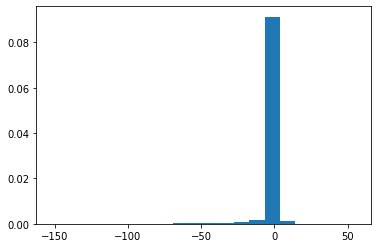

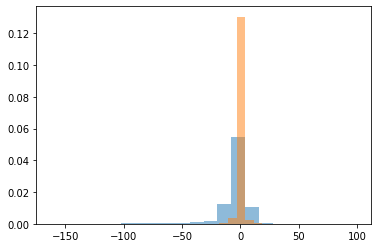

-0.017549285720791362
-2.330224500204925e-05


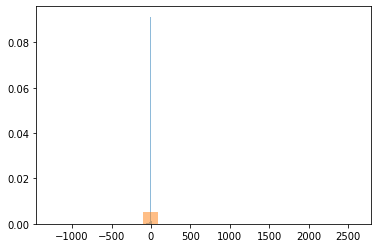

In [41]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()